In [3]:
# Analysis of RNA macromolecules
# Calculate RNA secondary structure
# Plot RNA
# Plot amino acids distribution
# (see later Clustal Omega, MUSCLE, or MAFFT)

import os
import sys
sys.path.insert(0, "../")
sys.path.append(os.path.abspath('../'))
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import matplotlib.pyplot as plt
from models.RNA_transformer.RNAsequences import RNAsequences

In [2]:
# Read extracted rna sequence data

path_data = "../data/raw/data_rna_central/general_dataframes/general_rnafm_0_2000.csv"
ds_raw = pd.read_pickle(path_data)
print(len(ds_raw), "RNA molecules")

max_length_row = ds_raw.loc[ds_raw["sequence"].str.len().idxmax()]
sequence = max_length_row["sequence"]
print("max sequence length", len(sequence), "nucleotides")

99950 RNA molecules
max sequence length 8370 nucleotides


the shortest RNA has 10 nucleotides
rna_types: ['misc_RNA', 'tRNA', 'rRNA', 'sRNA', 'pre_miRNA', 'ncRNA', 'other', 'RNase_P_RNA', 'circRNA', 'SRP_RNA', 'tmRNA', 'lncRNA', 'hammerhead_ribozyme', 'miRNA', 'snRNA', 'antisense_RNA', 'snoRNA']


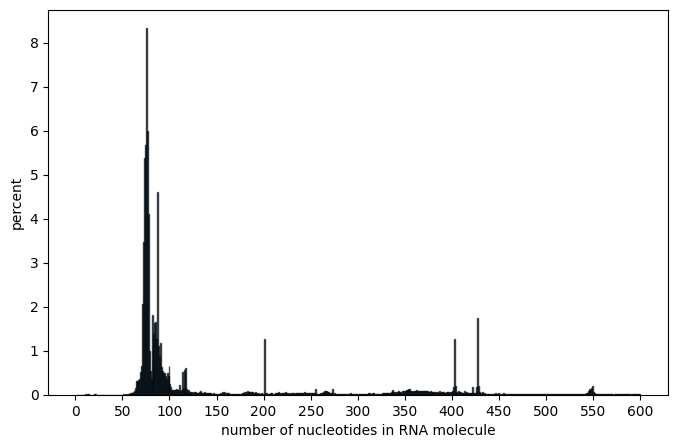

In [3]:
# Plot histogram of RNA length

string_lengths = ds_raw["sequence"].str.len()
print("the shortest RNA has", min(string_lengths), "nucleotides")
rna_types = ds_raw["rna_type"]
print("rna_types:", rna_types.unique().tolist())
xmax = 601 # max length for plot

plt.figure(figsize=(8,5))
weights = [100/len(string_lengths)] * len(string_lengths) 
plt.hist(string_lengths, bins=range(1, xmax, 1), edgecolor='black', alpha=0.7, weights=weights)
plt.xlabel("number of nucleotides in RNA molecule")
plt.ylabel("percent")
plt.xticks( range(0, xmax, 50) )
plt.show()

In [4]:
# Choose sub sequences for analysis

# Choose size
size = 73 # nucleotides
dela_size = 1

df_sizes = ds_raw[(ds_raw["sequence"].str.len()>=size)&(ds_raw["sequence"].str.len()<size+dela_size)]
rna_types = df_sizes["rna_type"]
print("rna_types with size from", size, "to", size+dela_size, ":")
print(rna_types.unique().tolist())


# Choose RNA type
df_sizes = df_sizes.loc[df_sizes["rna_type"]=="tRNA"]
df_sizes = df_sizes.reset_index(drop=True)

# Single sequence example
sequence = df_sizes.iloc[1]["sequence"]
print("the sequence", sequence)

rna_types with size from 73 to 74 :
['pre_miRNA', 'ncRNA', 'tRNA', 'rRNA', 'SRP_RNA', 'sRNA', 'hammerhead_ribozyme']
the sequence GGCUGGGUAGCUUAGUGAAUAGAGCGUCAGAUUCCGGUUCUGAAGGUCGGGGGUUUGAAUCCCUCCCUGGUCA


In [5]:
# Or Define the sequence to plot

rna_sequences = RNAsequences()
sequence = rna_sequences.get_SymR_Asequence()
sequence = rna_sequences.get_PTC5sequence()
sequence = rna_sequences.get_SymR_Psequence()+rna_sequences.get_SymR_Asequence()
sequence = 'GGCCCUGUGGCGCAACGGAUAACGCUUCUGACUGCGGAUCAGAAGAUUCCAGGUUCGAAUCCUGGCAGGGUCG'
sequence = 'GCCGAAAUAUCUCCGUUGGGAGAGCGUUAGACUGAAGAUCUAUAGGUCCCUGGUUCGAUCCUGGGUUUCGGCA'
# sequence = "TTGCUUUUUUUUCAACCGAAAAAAAA"

Sequence: GCCGAAAUAUCUCCGUUGGGAGAGCGUUAGACUGAAGAUCUAUAGGUCCCUGGUUCGAUCCUGGGUUUCGGCA
Secondary Structure: ((((((((.(((((....)))))......((((...........))))((.((......)).)))))))))). (MFE: (-24.50))


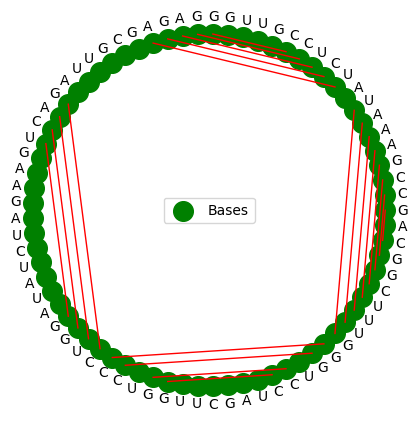

In [6]:
# Predict and plot secondary structure 

# RNAfold and RNAplot make part of ViennaRNA package
# see plot_circular_structure for more details
# installation: https://www.tbi.univie.ac.at/RNA/ViennaRNA/doc/html/install.html

from lib.lib_viz import plot_circular_structure

# Predict secondary structure 
result = subprocess.run(
    ['RNAfold'], input=str(sequence), text=True, capture_output=True
)
structure, mfe = result.stdout.strip().split('\n')[1].split(' ', 1)

# # Plot RNA secondary structure I
print(f"Sequence: {sequence}")
print(f"Secondary Structure: {structure} (MFE: {mfe})")

plot_circular_structure(sequence, structure)

c:\Users\User\work\rna_analysis\notebooks
Running RNAplot...
RNAplot executed successfully.
RNA structure image saved as rna_structure.png


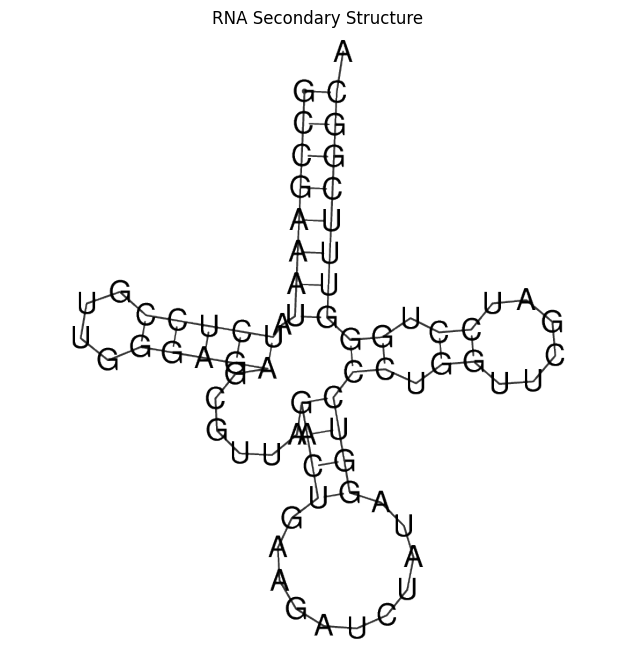

In [7]:
# Plot RNA secondary structure II

from lib.lib_viz import plot_rna_structure

plot_rna_structure(sequence, structure, output_image="rna_structure.png")


In [8]:
# PLot histogram of amino acids
# Define background and cluster to plot

# from 25k tRNA
background_25k = {'Leu': 2785, 'Ser': 2572, 'Arg': 2171, 'Thr': 2017, 'Pro': 1338, 'Val': 1321, 
              'Gly': 1250, 'Ala': 1140, 'Lys': 1085, 'Met': 1047, 'Ile': 926, 'OTH': 882, 
              'Glu': 875, 'Gln': 862, 'Cys': 606, 'His': 599, 'Tyr': 594, 'Asn': 531, 'Phe': 525, 
              'Asp': 497, 'Trp': 406, 'Sec': 233}
# from 100k tRNA
background_100k = {'Leu': 10694, 'Ser': 10427, 'Arg': 8545, 'Thr': 8042, 'Pro': 5392, 'Val': 5115, 
                   'Gly': 4976, 'Ala': 4607, 'Lys': 4387, 'Met': 4138, 'Ile': 3597, 'Glu': 3548, 
                   'OTH': 3537, 'Gln': 3374, 'Tyr': 2493, 'Cys': 2479, 'His': 2420, 'Phe': 2236, 
                   'Asn': 2182, 'Asp': 2010, 'Trp': 1733, 'Sec': 940}
withPTC = {'Arg': 46, 'Ala': 45, 'Gly': 38, 'Ser': 37, 'Met': 33, 'Pro': 24, 'Thr': 19, 'Val': 19, 'Leu': 19, 'His': 16, 'Asp': 13, 'Ile': 12, 'Glu': 11, 'Cys': 10, 'OTH': 10, 'Sec': 7, 'Phe': 7, 'Trp': 7, 'Gln': 6, 'Tyr': 6, 'Lys': 5, 'Asn': 5}
"""{'OTH': 480, 'Ser': 262, 'Leu': 203, 'Arg': 149, 'Met': 126, 'Cys': 84, 
          'Ala': 84, 'Pro': 82, 'Phe': 81, 'Lys': 79, 'Gly': 77, 'Glu': 74, 'Tyr': 72, 
          'Thr': 69, 'Ile': 68, 'Val': 64, 'His': 53, 'Gln': 51, 'Asp': 47, 'Trp': 44, 
          'Asn': 41, 'Sec': 30}"""


background = background_100k
cluster_toplot = {'OTHER': 480, 'Ser': 262, 'Leu': 203, 'Arg': 149, 'Met': 126, 'Cys': 84, 'Ala': 84, 'Pro': 82, 'Phe': 81, 'Lys': 79, 'Gly': 77, 'Glu': 74, 'Tyr': 72, 'Thr': 69, 'Ile': 68, 'Val': 64, 'His': 53, 'Gln': 51, 'Asp': 47, 'Trp': 44, 'Asn': 41, 'Sec': 30}


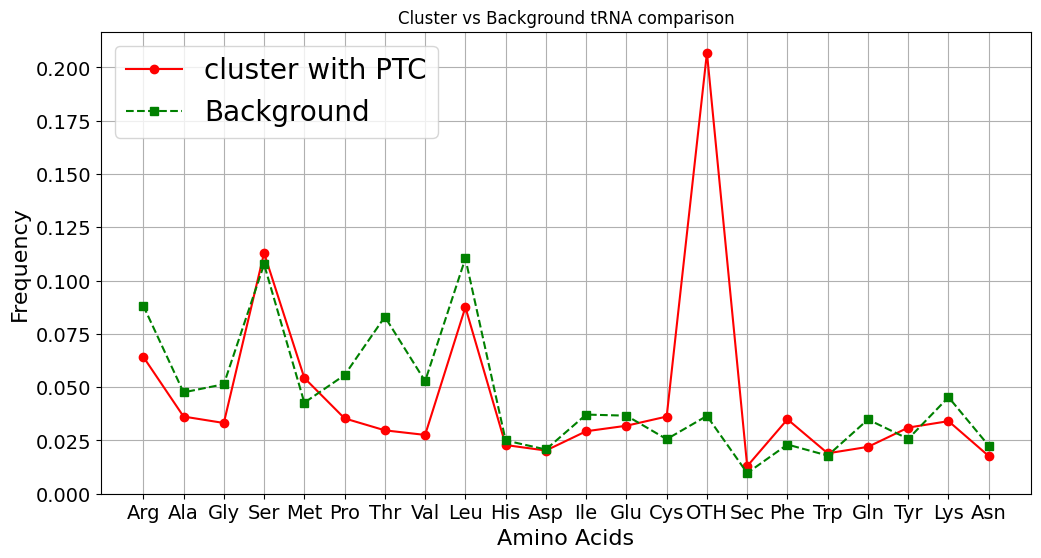

In [9]:

# change label for better visualization
cluster_toplot['OTH'] = cluster_toplot.pop('OTHER')
# define amino acid order
cluster = {}
for key in list(withPTC.keys()):
    cluster[key] = cluster_toplot[key]
# calculate normalization constants
background_norm = sum(list(background.values()))
cluster_norm = sum(list(cluster.values()))
background_norm, cluster_norm
# normalize
Y_background = []
Y_cluster = []
X = list(withPTC.keys())
for el in X:
    Y_background.append(background[el]/background_norm)
    Y_cluster.append(cluster[el]/cluster_norm)

# X-axis labels
xmax = 22
amino_acids = X[:xmax]

# Arbitrary y-values for two curves
curve1 = Y_cluster[:xmax]
curve2 = Y_background[:xmax]

# Plotting the curves
plt.figure(figsize=(12, 6))
plt.plot(amino_acids, curve1, label='cluster with PTC', marker='o', linestyle='-', color='red')
plt.plot(amino_acids, curve2, label='Background', marker='s', linestyle='--', color='green')
# Adding labels and title
plt.xlabel('Amino Acids', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Cluster vs Background tRNA comparison')
plt.legend(fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylim(bottom=0)

# Display the plot
plt.show()